In [ ]:
#The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). 
#The study is primarily limited  only to students with engineering disciplines. 
#The dataset contains the employment outcomes of engineering graduates as dependent variables 
#(Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, 
#technical skills and personality skills. 
#The dataset also contains demographic features. 
#The dataset  contains  around  40 independent variables and 4000 data points. 
#The independent variables are both continuous and categorical in nature. 
#The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
job_df=pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [3]:
job_df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
job_df.drop(columns=['Unnamed: 0'],inplace=True)
job_df[0:2]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637


In [15]:
job_df.shape

(3998, 38)

In [4]:
job_df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [ ]:
# There are 27 numerical columns

In [28]:
job_df.CollegeTier.unique()

array([2, 1], dtype=int64)

### UNIVARIATE ANALYSIS

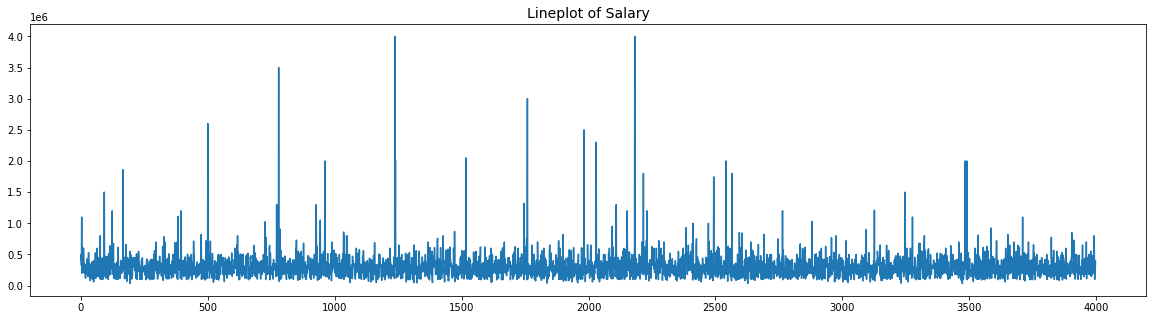

In [24]:
plt.figure(figsize=(20,10))
plt.title('Lineplot of Salary ',fontsize=14)
plt.plot(job_df.Salary)

In [ ]:
# So most people get a salary between (25,000) to (70,000)
# Only about 6 people get a salary above 25 lac

<ipython-input-45-42ea544934e0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  job_df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'10percentage'}>,
        <AxesSubplot:title={'center':'12graduation'}>,
        <AxesSubplot:title={'center':'12percentage'}>],
       [<AxesSubplot:title={'center':'CollegeID'}>,
        <AxesSubplot:title={'center':'CollegeTier'}>,
        <AxesSubplot:title={'center':'collegeGPA'}>,
        <AxesSubplot:title={'center':'CollegeCityID'}>,
        <AxesSubplot:title={'center':'CollegeCityTier'}>],
       [<AxesSubplot:title={'center':'GraduationYear'}>,
        <AxesSubplot:title={'center':'English'}>,
        <AxesSubplot:title={'center':'Logical'}>,
        <AxesSubplot:title={'center':'Quant'}>,
        <AxesSubplot:title={'center':'Domain'}>],
       [<AxesSubplot:title={'center':'ComputerProgramming'}>,
        <AxesSubplot:title={'center':'ElectronicsAndSemicon'}>,
        <AxesSubplot:title={'center':'ComputerScience'}>,
        <AxesSubplot:title=

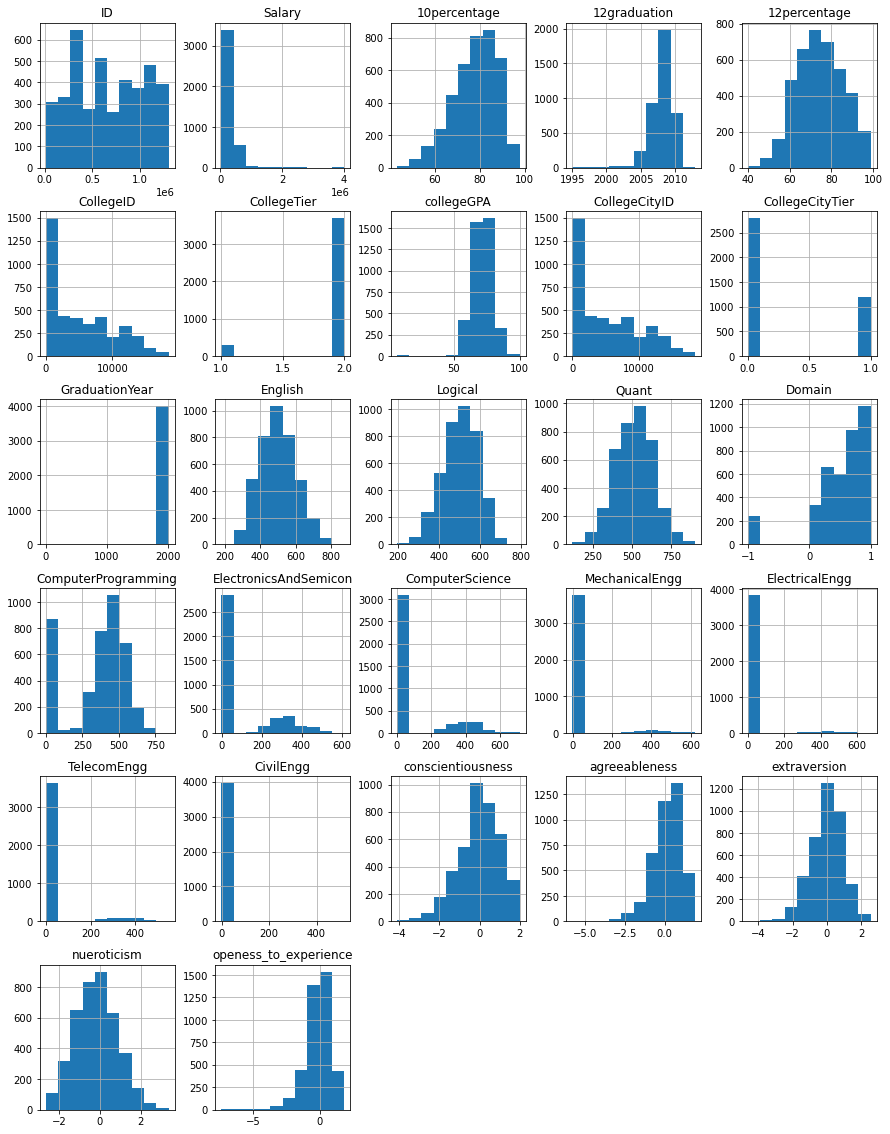

In [45]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
job_df.hist(ax = ax)

In [ ]:
# Normal Graphs: nueroticism,extraversion, ComputerProgramming, Quant, Logical, English,12percentage, 12 graduations,College GPA
# Left Skewed: Domain,openess_to_experience agreeableness,conscientiousness, 10percentage
# Right Skewed: CollegecityID, College ID
# single bar on leftside: civil engg, TelecomEngg,Electrical Engg, Mechanical Engg, Computer Science,Electronics and Semiconduc,
# single bar on leftside: Salary
# single bar on rightside:Graduation Year
# single bar on right and left ends: CollegecityTier, CollegeTier, 

array([[<AxesSubplot:title={'center':'10percentage_log'}>,
        <AxesSubplot:title={'center':'collegeGPA_log'}>]], dtype=object)

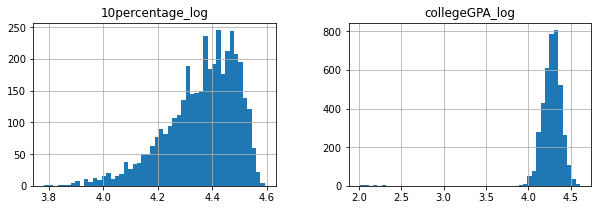

In [56]:
skewed_features=['10percentage','collegeGPA']
log_numerical_features=[]
for f in skewed_features:
    job_df[f+'_log']=np.log1p(job_df[f])
    log_numerical_features.append(f+'_log')
job_df[log_numerical_features].hist(bins=50,figsize=(10,3),label='Histograms of Log of Student Features')

In [ ]:
# We can see that the log graphs of the two variables are different from the previous graphs

In [62]:
job_df[0:2]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637


Text(0.5, 1.0, 'Histogram of Year of Graduation')

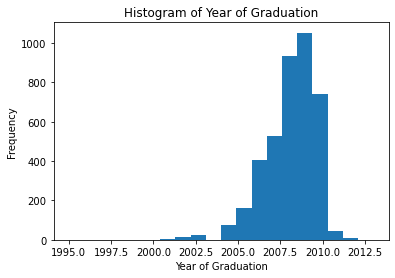

In [68]:
job_df['12graduation'].plot(kind='hist',bins=20)
plt.xlabel('Year of Graduation')
plt.title('Histogram of Year of Graduation')

In [ ]:
# Most students have graduated in the 2007 to 2009

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot of 10th Percentage ')

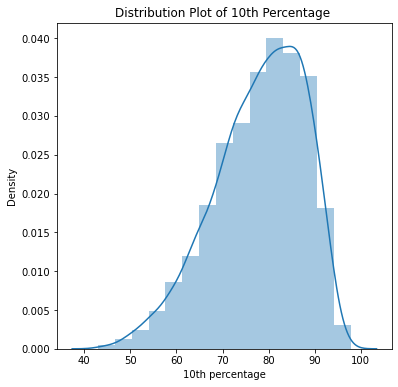

In [5]:
plt.figure(figsize=(6,6))
sns.distplot(job_df['10percentage'],bins=15)
plt.xlabel('10th percentage')
plt.title('Distribution Plot of 10th Percentage ')

In [ ]:
# Most students have scored a percentage between 70% and 90%

In [78]:
a=job_df['Degree'].unique()
b=list(a)
b

['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']

In [107]:
l=len(job_df[(job_df.Degree=='B.Tech/B.E.')]) # The number of students with B.Tech/B.E
m=len(job_df[(job_df.Degree=='MCA')]) # The number of students with MCA
n=len(job_df[(job_df.Degree=='M.Tech./M.E.')]) # The number of students with M.Tech./M.E.
o=len(job_df[(job_df.Degree=='M.Sc. (Tech.)')]) # The number of students with M.Sc. (Tech.)
print('The number of students which are B.Tech/B.E., MCA, M.Tech./M.E., M.Sc. (Tech.)are {},{},{},{}'.format(l,m,n,o))
values=[l,m,n,o]
Degrees=['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']

The number of students which are B.Tech/B.E., MCA, M.Tech./M.E., M.Sc. (Tech.)are 3700,243,53,2


Text(0.5, 1.0, 'Countplot of Students of different degree')

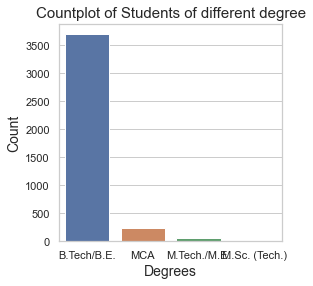

In [100]:
plt.figure(figsize=(4,4))
sns.countplot(x=job_df.Degree,data=job_df)
plt.xlabel('Degrees',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Countplot of Students of different degree',fontsize=15)

In [25]:
df2=job_df.groupby('Designation')[['Salary']].mean().add_prefix('Mean_')
df2
#print(apply(lambda('Salary'>2000000))

,Mean_Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


In [21]:
a=job_df.Designation.value_counts()
df1=pd.DataFrame(list(a),columns=['Count'])
df1['Designation']=pd.Series(list(dict(a).keys()))
df1

,Count,Designation
0,539,software engineer
1,265,software developer
2,205,system engineer
3,139,programmer analyst
4,118,systems engineer
...,...,...
414,1,logistics executive
415,1,quality control inspection technician
416,1,computer faculty
417,1,lecturer & electrical maintenance


In [26]:
df3=df1.merge(df2,how='inner',on='Designation')
df3

,Count,Designation,Mean_Salary
0,539,software engineer,341215.213358
1,265,software developer,258377.358491
2,205,system engineer,354048.780488
3,139,programmer analyst,339784.172662
4,118,systems engineer,369364.406780
...,...,...,...
414,1,logistics executive,150000.000000
415,1,quality control inspection technician,110000.000000
416,1,computer faculty,240000.000000
417,1,lecturer & electrical maintenance,200000.000000


Text(0.5, 1.0, 'Barplot of Salaries of the 40 most popular designations')

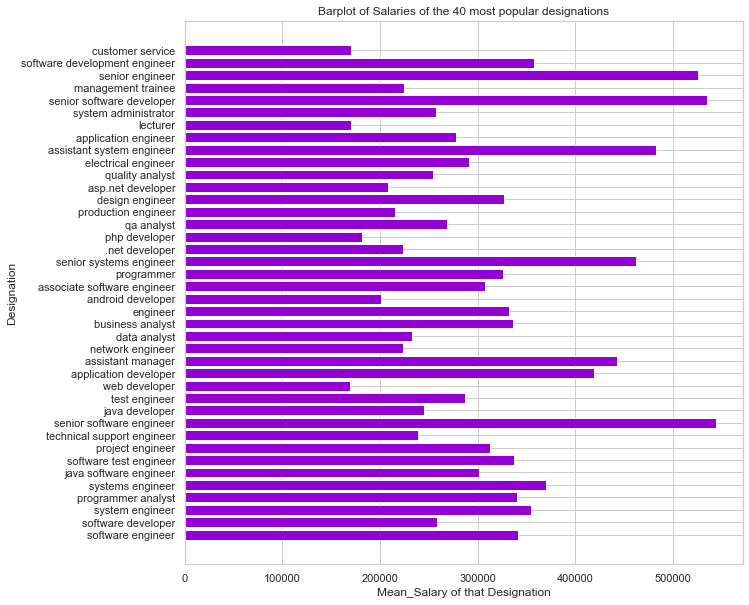

In [60]:
plt.figure(figsize=(10,10))
plt.barh(df3[0:40]['Designation'],df3[0:40]['Mean_Salary'],color='darkviolet')
plt.xlabel('Mean_Salary of that Designation')
plt.ylabel('Designation')
plt.title('Barplot of Salaries of the 40 most popular designations')

In [ ]:
# This is the mean salary of the 40 most popular designations, i.e the designations taken by most people
# The Salary is mostly between 2 lac and 4 lacs.
# Senior software developer and senior software engineer are having the highest salary,above 5 lac.
# It is followed by software development engineer

In [61]:
pd.pivot_table(job_df,values='Salary',index='Gender',columns='Designation',aggfunc='mean')

Designation,.net developer,.net web developer,account executive,account manager,admin assistant,administrative coordinator,administrative support,aircraft technician,android developer,application developer,...,ux designer,visiting faculty,web application developer,web designer,web designer and joomla administrator,web designer and seo,web developer,web intern,website developer/tester,windows systems administrator
Gender,,,,,,,,,,,,,,,,,,,,,
f,252500.000000,305000.0,192500.0,NaN,NaN,NaN,200000.0,100000.0,203928.571429,346875.000000,...,160000.0,NaN,350000.0,155000.0,NaN,200000.0,149117.647059,205000.0,NaN,200000.0
m,214423.076923,160000.0,382500.0,350000.0,102500.0,190000.0,NaN,NaN,199375.000000,451111.111111,...,720000.0,70000.0,187000.0,207500.0,60000.0,NaN,178108.108108,NaN,200000.0,NaN


In [ ]:
# Mean salary of male and female of different designations

In [62]:
job_df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [86]:
mean_Eng =job_df.English.mean()
mean_Log =job_df.Logical.mean()
mean_Qua =job_df.Quant.mean()
mean_con =job_df.conscientiousness.mean()
mean_agr =job_df.agreeableness.mean()
mean_ext =job_df.extraversion.mean()
mean_neu =job_df.nueroticism.mean()
mean_ote =job_df.openess_to_experience.mean()
mean_Eng()
(job_df.Logical> mean_Log())&(job_df.Quant> mean_Qua())&(job_df.conscientiousness> mean_con())&(job_df.agreeableness> mean_agr())
(job_df.extraversion> mean_ext()&(job_df.nueroticism> mean_neu())&(job_df.openess_to_experience> mean_ote())

501.64907453726863

In [98]:
job_df[(job_df.English> mean_Eng())&(job_df.Logical> mean_Log())&(job_df.Quant> mean_Qua())&(job_df.conscientiousness> mean_con())&(job_df.agreeableness> mean_agr())&(job_df.extraversion> mean_ext())&(job_df.nueroticism> mean_neu())&(job_df.openess_to_experience> mean_ote())]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
7,912934,400000,2014-07-01,2015-07-01 00:00:00,mechanical engineer,Bangalore,m,1992-05-27,92.00,cbse,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
97,1026621,300000,2014-09-01,present,software developer,Bangalore,f,1992-04-30,88.00,state board,...,438,-1,-1,-1,-1,0.5591,1.2114,1.8543,0.14590,0.0973
187,336792,410000,2013-02-01,present,programmer analyst,Hyderabad,m,1990-10-06,91.50,0,...,-1,-1,-1,-1,-1,0.5100,1.1248,0.5269,0.00353,0.1864
265,693698,120000,2013-02-01,2013-05-01 00:00:00,asp.net developer,Kanpur,m,1991-11-15,71.50,up board,...,-1,-1,-1,-1,-1,0.5591,0.5454,1.2396,0.14590,0.8637
392,593198,120000,2013-06-01,2014-04-01 00:00:00,cad designer,Hyderabad,m,1991-11-10,74.00,board secondary education,...,-1,-1,-1,-1,-1,0.2718,0.2124,0.0100,0.27270,-0.0943
657,553381,325000,2014-02-01,present,systems engineer,Chandigarh,m,1992-01-15,76.60,cbse,...,-1,-1,-1,-1,-1,-0.0154,1.0449,0.1637,1.54040,-0.0943
688,736093,300000,2014-01-01,2015-04-01 00:00:00,software engineer,Mumbai,f,1991-10-16,87.69,state board,...,315,-1,-1,-1,-1,0.4155,0.3789,1.0859,1.16010,0.4805
746,1084321,525000,2014-01-01,present,software developer,Navi Mumbai,m,1991-01-04,74.00,icse,...,315,-1,-1,-1,-1,0.9900,0.2124,0.9322,0.14590,1.0554
761,555652,305000,2013-08-01,2015-03-01 00:00:00,project engineer,Bangalore,m,1990-11-14,88.80,cbse,...,-1,-1,-1,-1,-1,-0.0154,1.0449,0.4711,1.03330,1.0554
774,1029538,340000,2014-03-01,present,application developer,-1,m,1990-08-05,73.50,state board,...,653,-1,-1,-1,-1,1.4208,1.0449,0.6248,0.27270,1.2470


In [ ]:
#There are 45 people who have a score, higher than the average score in English; Logical; Quant; 
#conscientiousness,openess_to_experience, agreeableness, extraversion, neuroticism

In [102]:
job_df.Degree.unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [109]:
l=len(job_df[(job_df.Degree=='B.Tech/B.E.')])
m=len(job_df[(job_df.Degree=='MCA')])
n=len(job_df[(job_df.Degree=='M.Tech./M.E.')])
o=len(job_df[(job_df.Degree=='M.Sc. (Tech.)')])
print('The number of students in B.Tech/B.E.: {}, MCA:{}, M.Tech./M.E.:{}, M.Sc. (Tech.):{}'.format(l,m,n,o))
values=[l,m,n,o]
Degrees=['B.Tech/B.E.','MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']

The number of students in B.Tech/B.E.: 3700, MCA:243, M.Tech./M.E.:53, M.Sc. (Tech.):2


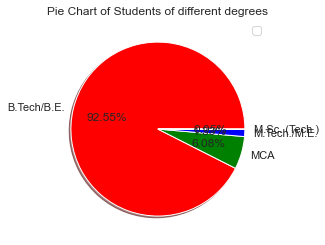

In [110]:
plt.legend(Degrees)
plt.pie(values,labels=Degrees,shadow=True,colors=['red','green','blue','yellow'],autopct='%0.2f%%')
plt.title('Pie Chart of Students of different degrees')
plt.show()

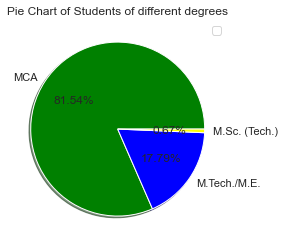

In [111]:
value=[m,n,o]
Degree=[ 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']
plt.legend(Degree)
plt.pie(value,labels=Degree,shadow=True,colors=['green','blue','yellow'],autopct='%0.2f%%')
plt.title('Pie Chart of Students of different degrees')
plt.show()

In [ ]:
# Most of the students belong to B.Tech/B.E
# It is followed by MCA, M.Tech/M.E, M.Sc.(Tech)

Text(0.5, 1.0, 'Boxplot of English, Quant, Logical')

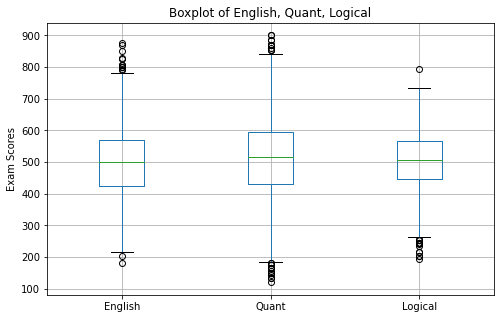

In [13]:
job_df.boxplot(column=['English','Quant','Logical'],figsize=(8,5))
plt.ylabel('Exam Scores')
plt.title('Boxplot of English, Quant, Logical')

In [ ]:
# The scores obtained in English Quant and Logical are are similar
# Median is around 500 for all three
# Interquartile range of the three are between 400 to 600

In [24]:
list(job_df.Degree.unique())

['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']

In [ ]:
These are the outliers of the Quant Scores of Students

In [15]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [7]:
numerical_columns=list(job_df.select_dtypes(include='number'))
k=0
for i in numerical_columns:
    s=job_df[i].quantile(0.75)
    t=job_df[i].quantile(0.25)
    a=s-t
    i_outlier=[]
    list1=list(job_df[i].unique())
    for j in list1:
        if ((j<(t-a)) or (j>(s+a))):
            i_outlier.append(j)
    print('Outliers of {}'.format(i))
    print(i_outlier)
    k+=1
print(k)

Outliers of ID
[]
Outliers of Salary
[1100000, 600000, 800000, 1500000, 640000, 1200000, 675000, 615000, 1860000, 660000, 700000, 625000, 785000, 690000, 1110000, 1000000, 715000, 820000, 720000, 2600000, 655000, 645000, 1025000, 775000, 1300000, 3500000, 910000, 570000, 730000, 680000, 630000, 1050000, 2000000, 860000, 580000, 4000000, 2020000, 650000, 610000, 760000, 585000, 620000, 870000, 2050000, 605000, 1320000, 755000, 880000, 3000000, 575000, 565000, 2500000, 2300000, 590000, 950000, 1800000, 725000, 930000, 750000, 705000, 1745000, 850000, 845000, 670000, 1030000, 770000, 900000, 1210000, 810000, 925000]
Outliers of 10percentage
[52.33, 56.0, 55.6, 51.0, 55.0, 50.6, 56.5, 57.0, 53.4, 52.0, 44.16, 44.0, 45.6, 48.0, 53.3, 55.5, 49.0, 56.78, 51.2, 48.8, 55.52, 48.5, 43.0, 52.7, 52.93, 54.0, 57.67, 50.0, 56.16, 53.06, 45.33, 53.0, 46.24, 51.36, 53.8, 54.5, 50.5, 56.2, 55.3, 51.6, 57.5, 50.66, 53.6, 46.8, 54.8, 52.5, 56.4, 54.6, 54.83, 51.83, 51.42, 55.33, 46.0, 54.4, 49.9, 57.14, 

In [ ]:
# It gives the outliers of all the numerical columns i.e(float64,int64,datetime64[ns])
# we have excluded the columns of the dtype : 'object'

###### COLUMN STANDARDIZATION

In [ ]:
#Standardize generally means changing the values so that the distribution is centered around 0, with a standard deviation of 1. 
#It outputs something very close to a normal distribution.


In [15]:
job_df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [14]:
a=job_df.select_dtypes(include=['number'])
a

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,84.30,2007,95.80,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,85.40,2007,85.00,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,85.00,2010,68.20,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,85.60,2007,83.60,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,78.00,2008,76.80,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,52.09,2006,55.50,6268,2,61.50,6268,0,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,90.00,2009,93.00,4883,2,77.30,4883,1,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,81.86,2008,65.50,9786,2,70.00,9786,0,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,78.72,2010,69.88,979,2,70.42,979,1,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

job_df_standard_scale=pd.DataFrame(StandardScaler().fit_transform(a))
job_df_standard_scale.columns = list(a.columns)
job_df_standard_scale

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,-1.268535,0.527947,0.647233,-0.657765,1.939676,-0.836346,0.283282,0.797646,-0.836346,-0.655278,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.983466,0.707581,0.550939,1.512658,-0.304966
1,-0.230991,0.904045,0.758921,-0.657765,0.957729,0.135401,0.283282,-0.174641,0.135401,-0.655278,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.676367,0.246801,1.300083,0.060978,0.993910
2,0.404233,0.081332,0.718307,1.156686,-0.569744,-1.060644,0.283282,-0.181988,-1.060644,-0.655278,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.301041,1.661318,0.169167,-0.693995,0.803821
3,-1.091347,3.724775,0.779227,-0.657765,0.830439,0.367196,-3.530054,0.386200,0.367196,1.526071,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,0.081894,0.210589,-0.364495,-0.237001,-0.775129
4,-0.881871,-0.506320,0.007570,-0.052948,0.212176,1.293542,0.283282,0.295584,1.293542,-0.655278,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.819775,-0.452174,-1.127304,0.258734,0.008542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,-1.695828,-0.130223,-2.623172,-1.262582,-1.724441,0.231409,0.283282,-1.222849,0.231409,-0.655278,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.068416,0.210589,0.245794,0.812774,-0.775129
3994,0.245025,-0.976442,1.225977,0.551869,1.685097,-0.057033,0.283282,0.711928,-0.057033,1.526071,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-0.257520,0.777245,0.976964,0.941813,0.043465
3995,-0.847824,0.057826,0.399491,-0.052948,-0.815231,0.964072,0.283282,-0.181988,0.964072,-0.655278,...,-0.523491,-0.244363,-0.199587,-0.313347,-0.100503,-1.495978,-1.777487,-1.584968,-1.140864,-0.618474
3996,0.780115,-0.506320,0.080674,1.156686,-0.416997,-0.870085,0.283282,-0.130557,-0.870085,1.526071,...,1.981485,-0.244363,-0.199587,-0.313347,-0.100503,-0.117807,-0.106828,-0.477071,-0.190746,0.043465


In [ ]:
# This is the column standardization of every column i.e we have replaced every value of every numerical column with 
# its z-score i.e [(Value-Mean)/standard deviation]
# An example is given below:

In [37]:
z1=job_df.Salary[0]-job_df.Salary.mean()
z2=z1/job_df.Salary.std() # job_df.Salary.std() gives the standard deviation of the column : 'Salary'
z2

0.5278813095848718

The categorical columns of the dataframe are :
Categorical Columns:
Designation, JobCity, Gender, CollegeTier, Degree, Specialization, CollegeCityTier, CollegeState
It is given that:\
For Categorical -> if more than 2 categories, use dummy variables. Otherwise
convert the feature to Binary.

In [ ]:
# Each categorical column is replaced by the number of unique categories it has in the data set containing dummy variables.

In [41]:
# Creating a copy of the original dataframe
df_dummies=job_df.copy() 
# To get the dummy variables
df_dummies = pd.get_dummies(df_dummies,columns = ['Designation', 'JobCity', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier', 'CollegeState'])
df_dummies['Gender']=df_dummies['Gender'].map({"m":1,"f":0})
display(df_dummies)

,ID,Salary,DOJ,DOL,Gender,DOB,10percentage,10board,12graduation,12percentage,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,203097,420000,2012-06-01,present,0,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,...,0,0,0,0,0,0,0,0,0,0
1,579905,500000,2013-09-01,present,1,1989-10-04,85.40,cbse,2007,85.00,...,0,0,0,0,0,0,0,0,0,0
2,810601,325000,2014-06-01,present,0,1992-08-03,85.00,cbse,2010,68.20,...,0,0,0,0,0,0,0,1,0,0
3,267447,1100000,2011-07-01,present,1,1989-12-05,85.60,cbse,2007,83.60,...,0,0,0,0,0,0,0,0,0,0
4,343523,200000,2014-03-01,2015-03-01 00:00:00,1,1991-02-27,78.00,cbse,2008,76.80,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,1,1987-04-15,52.09,cbse,2006,55.50,...,0,0,0,0,0,0,0,0,0,0
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,0,1992-08-27,90.00,state board,2009,93.00,...,0,0,0,0,0,1,0,0,0,0
3995,355888,320000,2013-07-01,present,1,1991-07-03,81.86,"bse,odisha",2008,65.50,...,1,0,0,0,0,0,0,0,0,0
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,0,1992-03-20,78.72,state board,2010,69.88,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# For all the categorical columns with more than two variables we have created dummy variables. 
# ex: For College_State the dummy variables are : College_State_Orissa,College_State_Punjab etc 
# The categorical column with only two variables is the "Gender", it is converted to Binary. 1 represents m and 0 represents f.

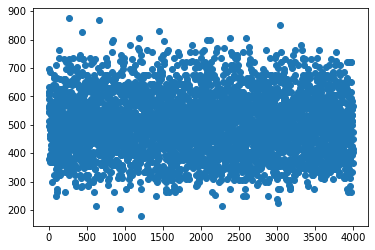

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [11]:
plt.scatter(job_df.index,job_df.English)
plt.show()
plt.figure(figsize=(7,7))

In [ ]:
# Most of the English Scorees are between 300 to 800

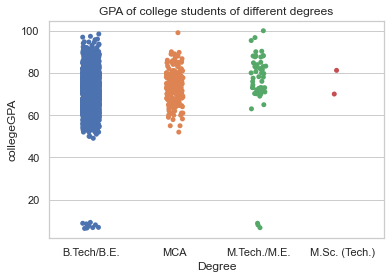

In [25]:
sns.set(style = 'whitegrid')  
       
sns.stripplot(x="Degree", y="collegeGPA", data=job_df)
plt.title('GPA of college students of different degrees')
plt.show()

In [ ]:
# All the degrees are having most of the students in the GPA range  between 50 to 90

In [30]:
job_df.CollegeTier.unique()

array([2, 1], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salary of different job holders')

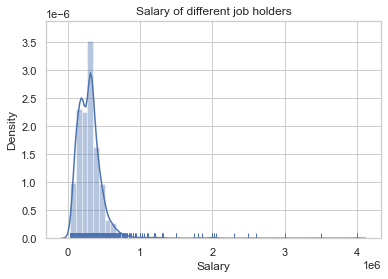

In [45]:
sns.distplot(job_df.Salary,rug=True,hist=True)
plt.title('Salary of different job holders')

In [ ]:
# The highest salary goes to a single person, which is 40lacs
# Most of the people are paid below 1lac
# There are some people between 1 lac to 3.5 lac
# As the salary is increasing , the frequency is decreasing

In [40]:
job_df.Salary.describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [21]:
a=job_df.Specialization.value_counts()
b=dict(a)
spec={'Specialization':list(b.keys()),'value':list(b.values())}
spec_df=pd.DataFrame(spec)
spec_df.head()


,Specialization,value
0,electronics and communication engineering,880
1,computer science & engineering,744
2,information technology,660
3,computer engineering,600
4,computer application,244


Text(0.5, 1.0, 'Violinplot of College GPA of male and female')

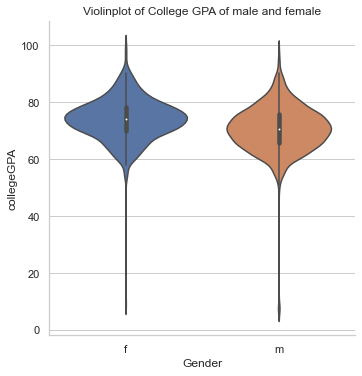

In [89]:
sns.catplot(x='Gender',y='collegeGPA',data=job_df,kind='violin')
plt.title('Violinplot of College GPA of male and female')

In [ ]:
# Females have a slightly higher median GPA than males 
# Both the gender have the maximum number if people in between 60 to 80

In [86]:
len(job_df['JobCity'].unique())

339

Text(0.5, 1.0, 'Countplot of number of colleges in a state of each tier')

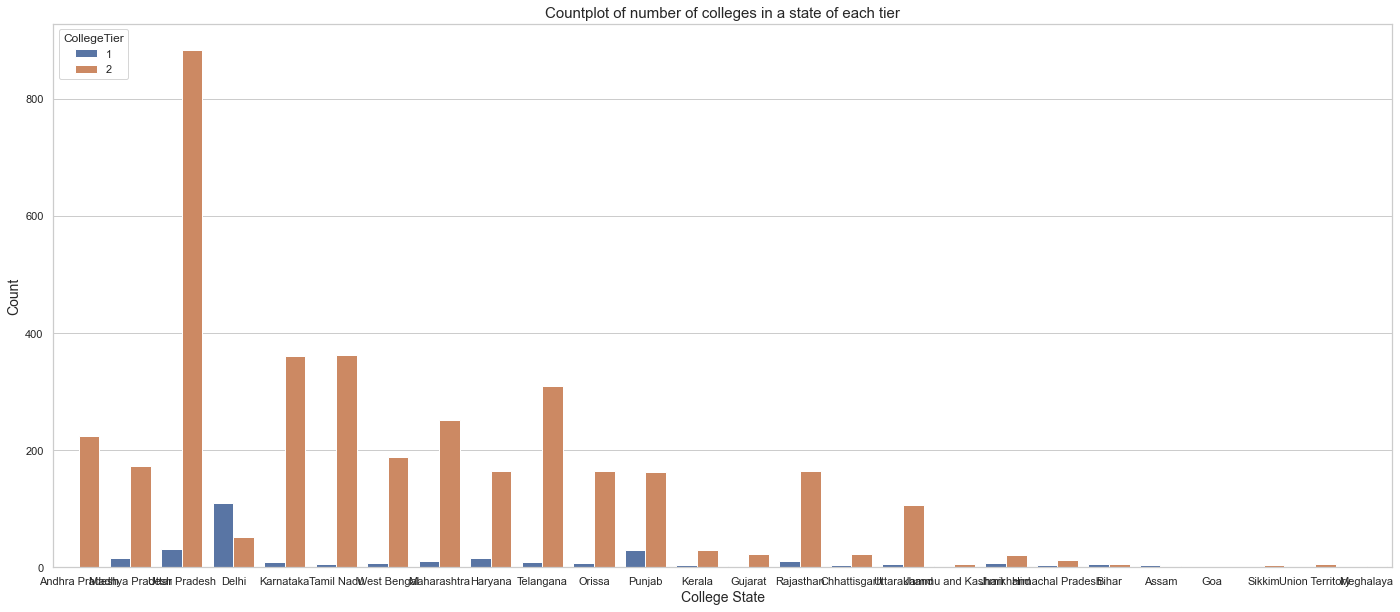

In [90]:
plt.figure(figsize=(24,10))
sns.countplot(x=job_df.CollegeState,hue='CollegeTier',data=job_df)
plt.xlabel('College State',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Countplot of number of colleges in a state of each tier',fontsize=15)

In [ ]:
# Uttar Pradesh has the highest number of colleges of Tier2
# It is followed by Karnataka, Tamil Nadu, and Telangana
# Delhi has the highest number of Tier1 Colleges 
# It is followed by Uttar Pradesh and Punjab

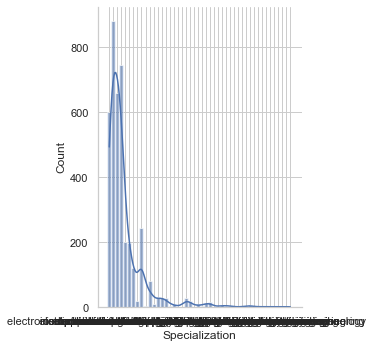

In [112]:
sns.displot(job_df.Specialization, kde=True)

In [60]:
job_df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

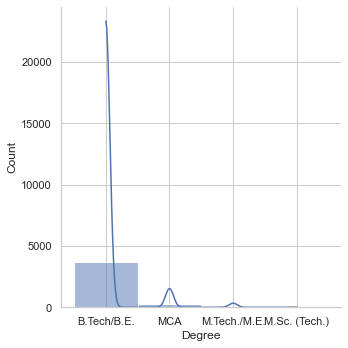

In [113]:
sns.displot(job_df.Degree, kde=True)

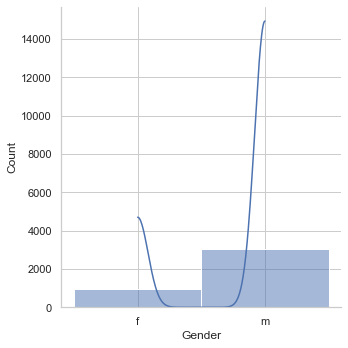

In [114]:
sns.displot(job_df.Gender, kde=True)

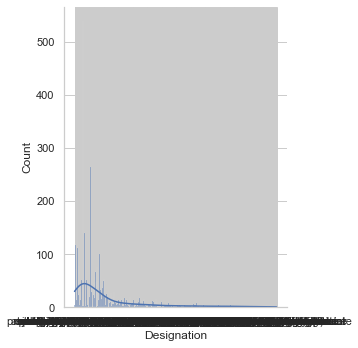

In [115]:
sns.displot(job_df.Designation, kde=True)

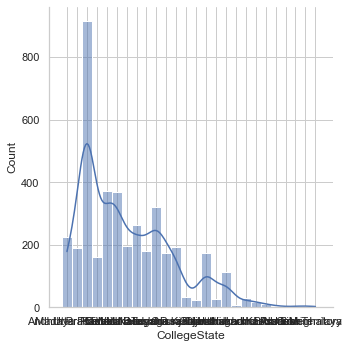

In [116]:
sns.displot(job_df.CollegeState, kde=True)

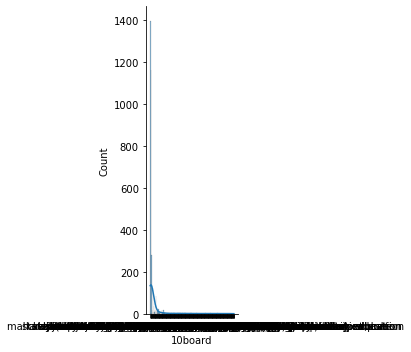

In [70]:
data_10board = job_df.set_index("10board")
data_10board = data_10board.drop(0)
sns.displot(data_10board['10board'], kde=True)

In [ ]:
# The only int value in the 10th board is 0

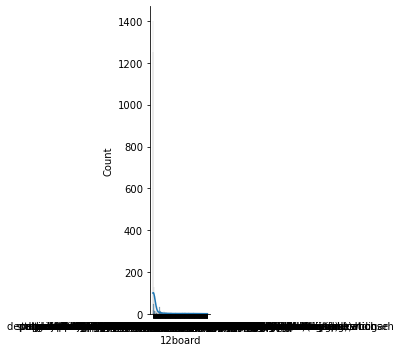

In [74]:
data_12board = job_df.set_index("12board")
data_12board = data_12board.drop(0)
sns.displot(data_12board, x="12board", kde=True)

In [ ]:
#The only int value in the 12th board is 0

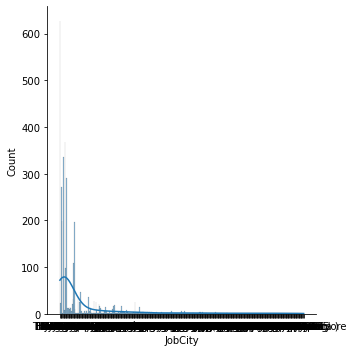

In [84]:
data_df1= job_df.set_index("12board")
data_df1 = data_df1.loc[data_df1["JobCity"] != (-1)]
sns.displot(data_df1, x="JobCity", kde=True)

### BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Boxplot of English, Quant, Logical')

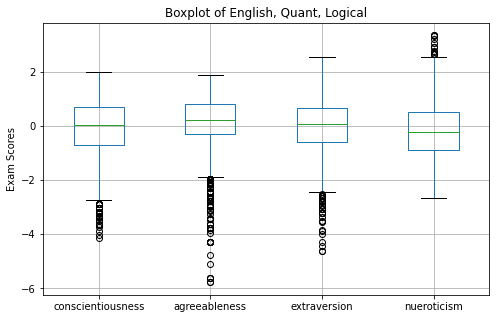

In [119]:
job_df.boxplot(column=['conscientiousness','agreeableness','extraversion','nueroticism'],figsize=(8,5))
plt.ylabel('Exam Scores')
plt.title('Boxplot of English, Quant, Logical')

In [ ]:
# The scores obtained in conscientiousness','agreeableness','extraversion','neuroticism are similar
# Median is around 0 for all four
# Interquartile range of the four are between -1 to +1

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.1% of the points

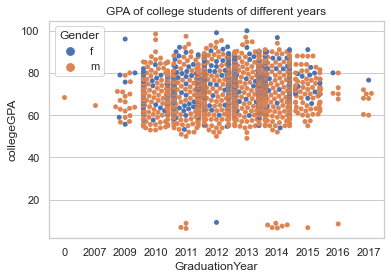

<Figure size 720x720 with 0 Axes>

In [37]:
sns.swarmplot(x="GraduationYear",y="collegeGPA",hue="Gender",data=job_df)
plt.title('GPA of college students of different years')
plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# It shows that both female and male  got similar GPA
# The GPA values of most students are between 50 to 90
# We can also see that there are more number of males than females
# The data has most of the students who have graduated between 2010 to 2015

In [26]:
job_df.GraduationYear.value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
0          1
Name: GraduationYear, dtype: int64

In [27]:
job_df.GraduationYear

0       2011
1       2012
2       2014
3       2011
4       2012
        ... 
3993    2010
3994    2013
3995    2012
3996    2014
3997    2012
Name: GraduationYear, Length: 3998, dtype: int64

Text(0.5, 1.0, 'Barplot of College GPA of different States')

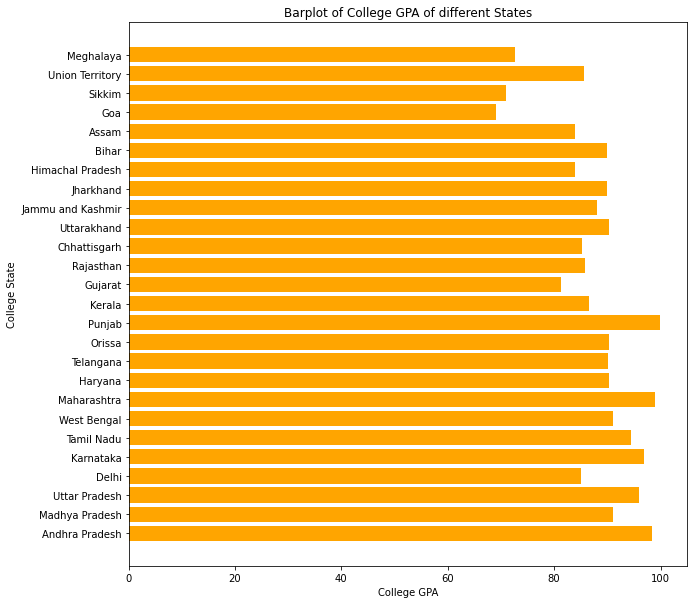

In [34]:
plt.figure(figsize=(10,10))
plt.barh(job_df['CollegeState'],job_df['collegeGPA'],color='orange')
plt.xlabel('College GPA')
plt.ylabel('College State')
plt.title('Barplot of College GPA of different States')

In [ ]:
# The colleges in Punjab have the highestGPA
# It is followed by Maharastra and Andra Pradesh
# Most states are having a GPA above 80

In [23]:
a=job_df.Specialization.value_counts()
b=dict(a)
spec={'Specialization':list(b.keys()),'value':list(b.values())}
spec_df=pd.DataFrame(spec)
spec_df.head()

,Specialization,value
0,electronics and communication engineering,880
1,computer science & engineering,744
2,information technology,660
3,computer engineering,600
4,computer application,244


Text(0.5, 1.0, 'Barplot of Number of students of a Specialization')

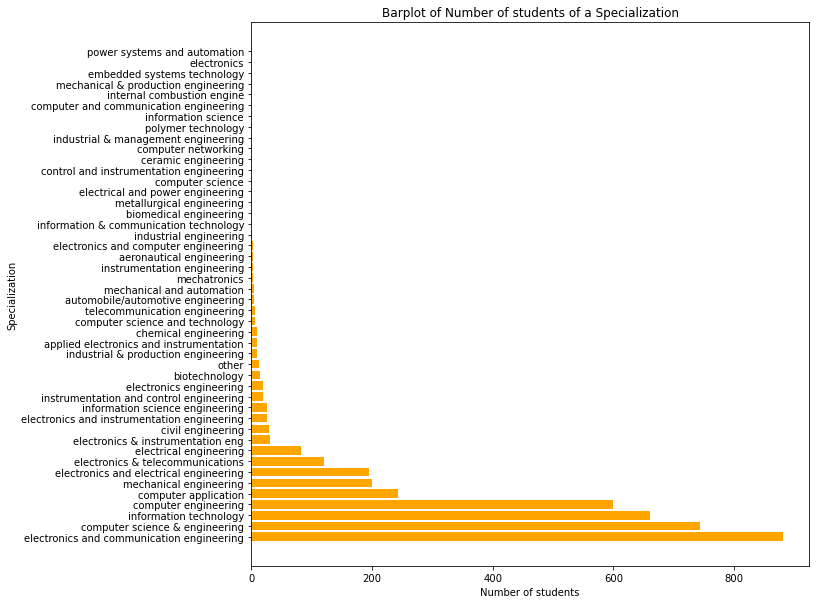

In [86]:
plt.figure(figsize=(10,10))
plt.barh(spec_df['Specialization'],spec_df['value'],color='orange')
plt.xlabel('Number of students')
plt.ylabel('Specialization')
plt.title('Barplot of Number of students of a Specialization')

In [ ]:
# Most students have joined in Electronics and communication engineering, and then CSE, IT,computer application etc
# There are 46 specializations in total.
# Only 8 specializations have students more than 100
# And only 17 specializations have more than 10 students

In [36]:
len(job_df.Specialization.value_counts())

46

Text(0.5, 1.0, 'Scatterplot of Salary and College GPA')

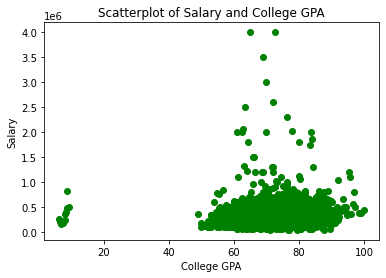

In [87]:
plt.scatter(job_df.collegeGPA,job_df.Salary,c='green')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.title('Scatterplot of Salary and College GPA')

In [ ]:
# The salary doesnt depend much on GPA
# But most of the job holders have a GPA between 50 to 90
# The highest CGPA person is NOT the highest paid
#The highest pay went to those of GPA between 60 and 70

In [90]:
a=('Salary','10percentage','12percentage','collegeGPA','CollegeTier','CollegeCityTier','Logical', 'Quant', 'Domain', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'conscientiousness', 'agreeableness', 'extraversion','English', 'ComputerProgramming', 'ElectronicsAndSemicon', 'TelecomEngg', 'CivilEngg', 'nueroticism', 'openness_to_experience')

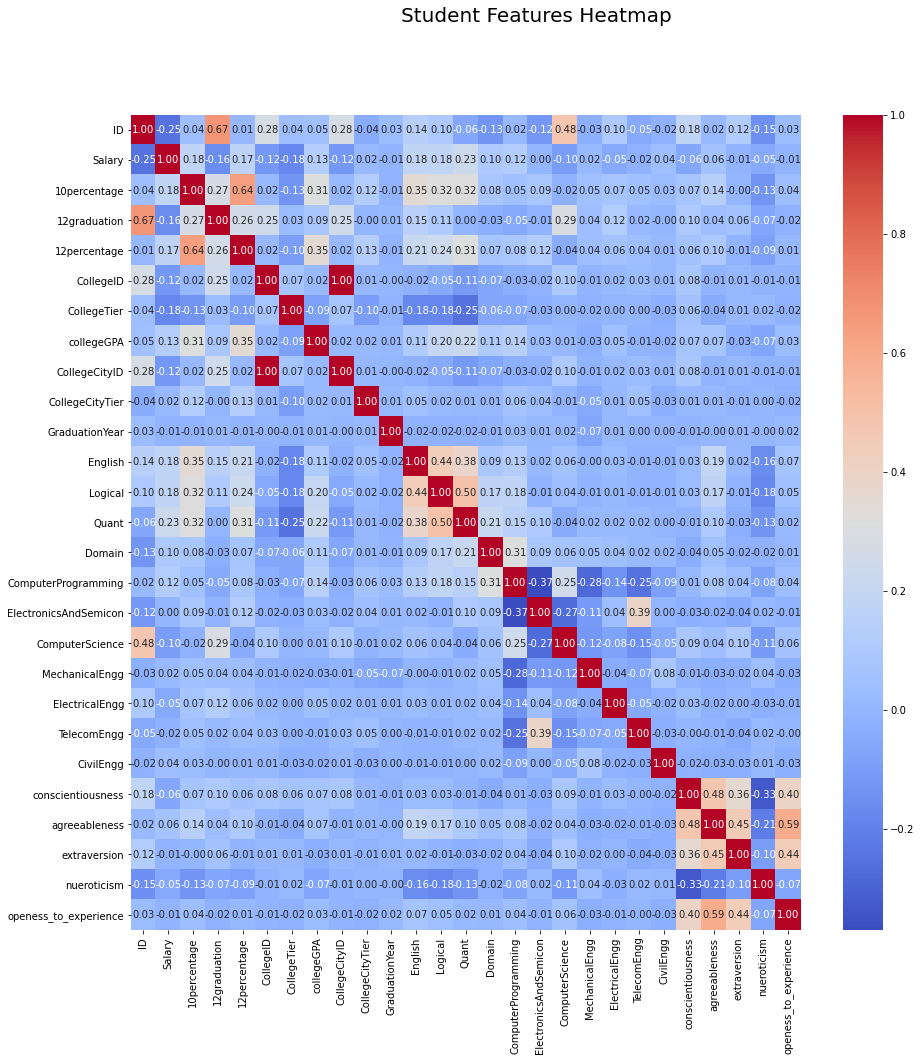

In [95]:
f,ax = plt.subplots(figsize=(15,15))
corr=job_df.corr()
hm=sns.heatmap(round(corr,2),annot=True,cmap='coolwarm',fmt='.2f')
t=f.suptitle('Student Features Heatmap',fontsize=20)

In [ ]:
#There is a positive corelation between :
#10thpercentage and 12th percentage
#English, Logical, Quant are related
#10th and 12th percentage related with the collegeGPA, Eng,Logical,Quant
#CollegeID and CollegeCityID are the same columns
#Computer Programming and Computer Science
#Computer Programming and Domain
#Conscientiousness, agreeableness, extraversion, openness_to_experience are related
#ElectronicsAnd Semicon and TelecomEngg

Text(0.5, 1.0, 'Regression plot between 10th percentage and 12th percentage')

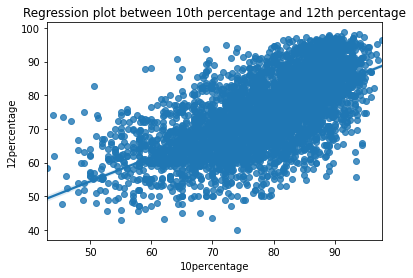

In [97]:
sns.regplot(x='10percentage',y='12percentage',data=job_df)
plt.title('Regression plot between 10th percentage and 12th percentage')

In [ ]:
# We can see that the 1OTH percentage and 12th percentage are positively corelated
# Most of the students have a 10th percentage of 60-95 and a 12 percentage of 60-95.

Text(0.5, 1.0, 'Boxplot of Salaries of different Specializations')

<Figure size 600x400 with 0 Axes>

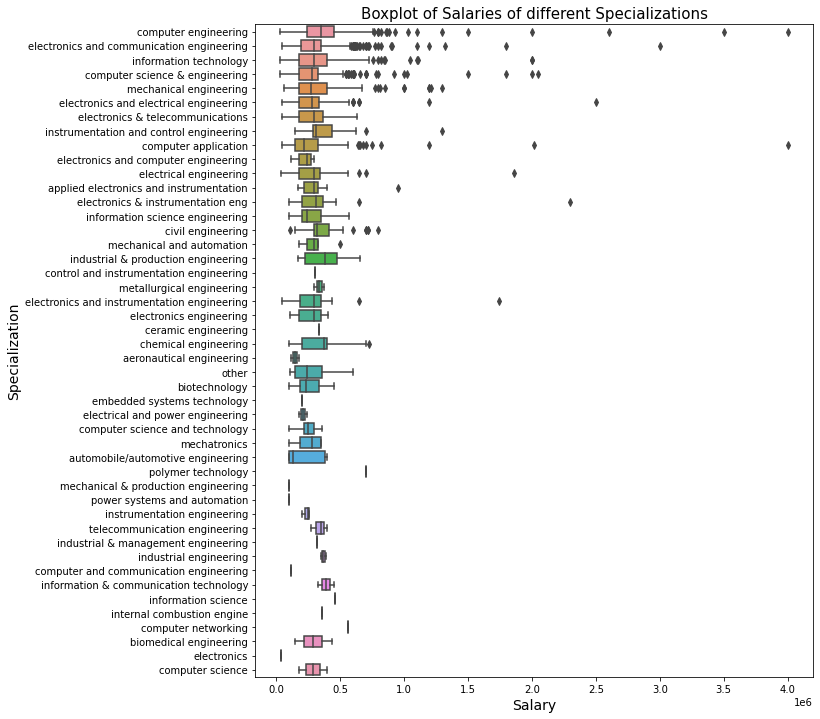

In [98]:
plt.figure(dpi=100)
plt.figure(figsize=(10,12))
sns.boxplot(x='Salary',y='Specialization',data=job_df)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Specialization',fontsize=14)
plt.title('Boxplot of Salaries of different Specializations',fontsize=15)

In [ ]:
# Most specializations have their salary range between 1lac to 7.5 lac
# After 8 lac , almost all the salaries are outliers, i.e very few people get above 8 lac
# computer engineering and computer application specialized candidates are the top 3 salaries.It is followed by ECE
# electronics is receiving the least salary followed by mechanical&production engineering, power systems and autimatuibs

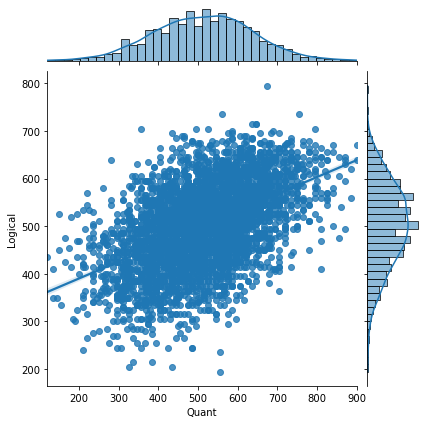

In [103]:
sns.jointplot(x='Quant',y='Logical',data= job_df,kind='reg')
#plt.title('Jointplot of Price vs Front Camera Pixel')
#plt.figure(figsize=(20,8))

In [ ]:
# We can see a positive corelation between the scores in Logical and Quant
# Most data points are having a Quant : 300-700 and a Logical: 350-650
# Both of them are almost normal graphs i.e not skewed

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Lineplot of Extraversion and Agreeableness score, for different levels of Degree')

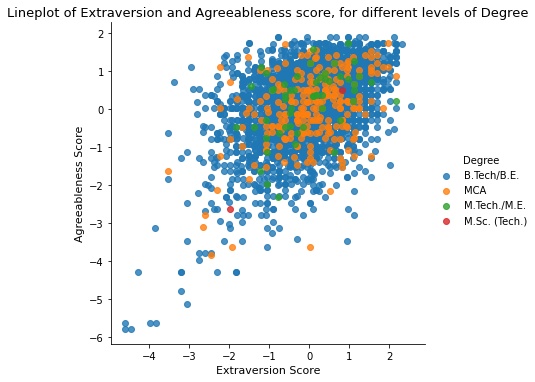

In [105]:
sns.lmplot('Extraversion','agreeableness',data=job_df,hue='Degree',fit_reg=False)# fit_reg can add a regression line
plt.xlabel('Extraversion Score',fontsize=11)
plt.ylabel('Agreeableness Score',fontsize=11)
plt.title('Lineplot of Extraversion and Agreeableness score, for different levels of Degree',fontsize=13)

In [ ]:
# There is no much difference in extraversion and agreeableness due to the difference in degree
# Most of the students have Extraversion Score: -2 to +2 and Agreeableness Score:-1.5 to 2

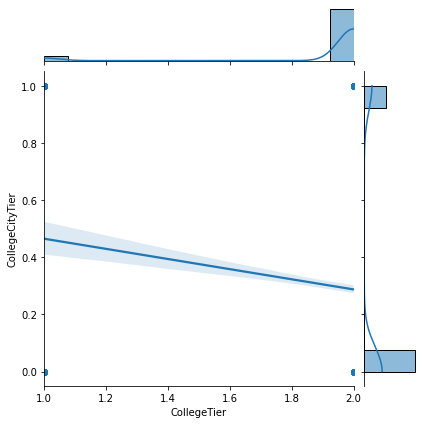

In [106]:
sns.jointplot(x='CollegeTier',y='CollegeCityTier',data= job_df,kind='reg')

Text(0.5, 1.0, 'Scatterplot of College Tier and College GPA')

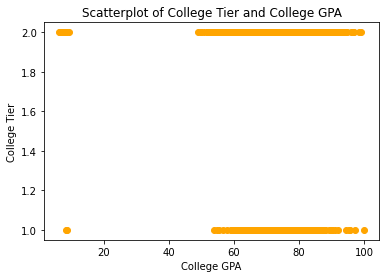

In [111]:
plt.scatter(job_df.collegeGPA,job_df.CollegeTier,c='orange')
plt.xlabel('College GPA')
plt.ylabel('College Tier')
plt.title('Scatterplot of College Tier and College GPA')

In [ ]:
# Tier 1 colleges have lesser number of students with low GPA than Tier 2 colleges

In [113]:
from matplotlib.colors import LinearSegmentedColormap

Text(0.5, 1.0, 'Linear Segmented Color map of conscientiousness and openness_to_experience score)')

<Figure size 504x504 with 0 Axes>

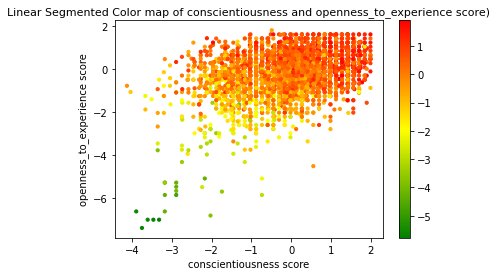

In [115]:
plt.figure(figsize=(7,7))
cmap=LinearSegmentedColormap.from_list(name='name',colors=['green','yellow','red'])
f,ax=plt.subplots()
points=ax.scatter(job_df.conscientiousness,job_df.openess_to_experience ,c=job_df.agreeableness,s=10,cmap=cmap)
f.colorbar(points)
plt.ylabel('openness_to_experience score',fontsize=10)
plt.xlabel('conscientiousness score',fontsize=10)
plt.title('Linear Segmented Color map of conscientiousness and openness_to_experience score)',fontsize=11)

In [ ]:
# We can see a positive corelation between the 3 factors ofConscientiousness, agreeableness, openness_to_experience 
# The red values shoes an agreeableness score of 1
# The green values shown an agreeableness score of -5

Text(0.5, 1.0, 'Linear Segmented Color map of scores of Logical and Quant, based on 10percentage')

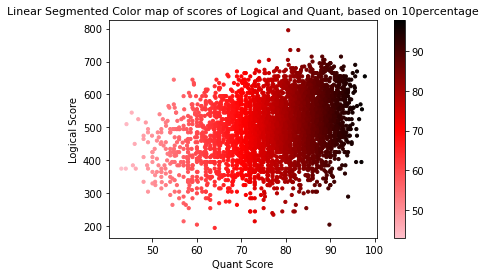

In [117]:
cmap=LinearSegmentedColormap.from_list(name='name',colors=['pink','red','black'])
f,ax=plt.subplots()
points=ax.scatter(job_df['10percentage'],job_df['Logical'],c=job_df['10percentage'],s=10,cmap=cmap)
f.colorbar(points)
plt.ylabel('Logical Score',fontsize=10)
plt.xlabel('Quant Score',fontsize=10)
plt.title('Linear Segmented Color map of scores of Logical and Quant, based on 10percentage',fontsize=11)

In [ ]:
## We can see a positive corelation between the 3 factors ofConscientiousness, agreeableness, openness_to_experience 
# The black values has an English score of above 90
# The pink values has an English score below 60

Text(0.5, 1.0, 'Linear Segmented Color map of scores of Computer Programming and Computer Science, based on Domain Score')

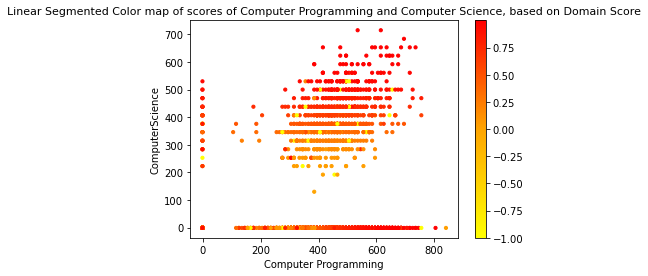

In [122]:
cmap=LinearSegmentedColormap.from_list(name='name',colors=['yellow','orange','red'])
f,ax=plt.subplots()
points=ax.scatter(job_df['ComputerProgramming'],job_df['ComputerScience'],c=job_df['Domain'],s=10,cmap=cmap)
f.colorbar(points)
plt.ylabel('ComputerScience',fontsize=10)
plt.xlabel('Computer Programming',fontsize=10)
plt.title('Linear Segmented Color map of scores of Computer Programming and Computer Science, based on Domain Score',fontsize=11)

In [ ]:
# Those students which do not belong to the particular Specialization have got a score of 0
# We can see a positive corelation between the Computer Programming, Computer Science, and Domain Scores
# The yellow color =  Domain Score= below -0.75; Orange =  Domain Score: around 0; Red = Domain Score = above 0.75

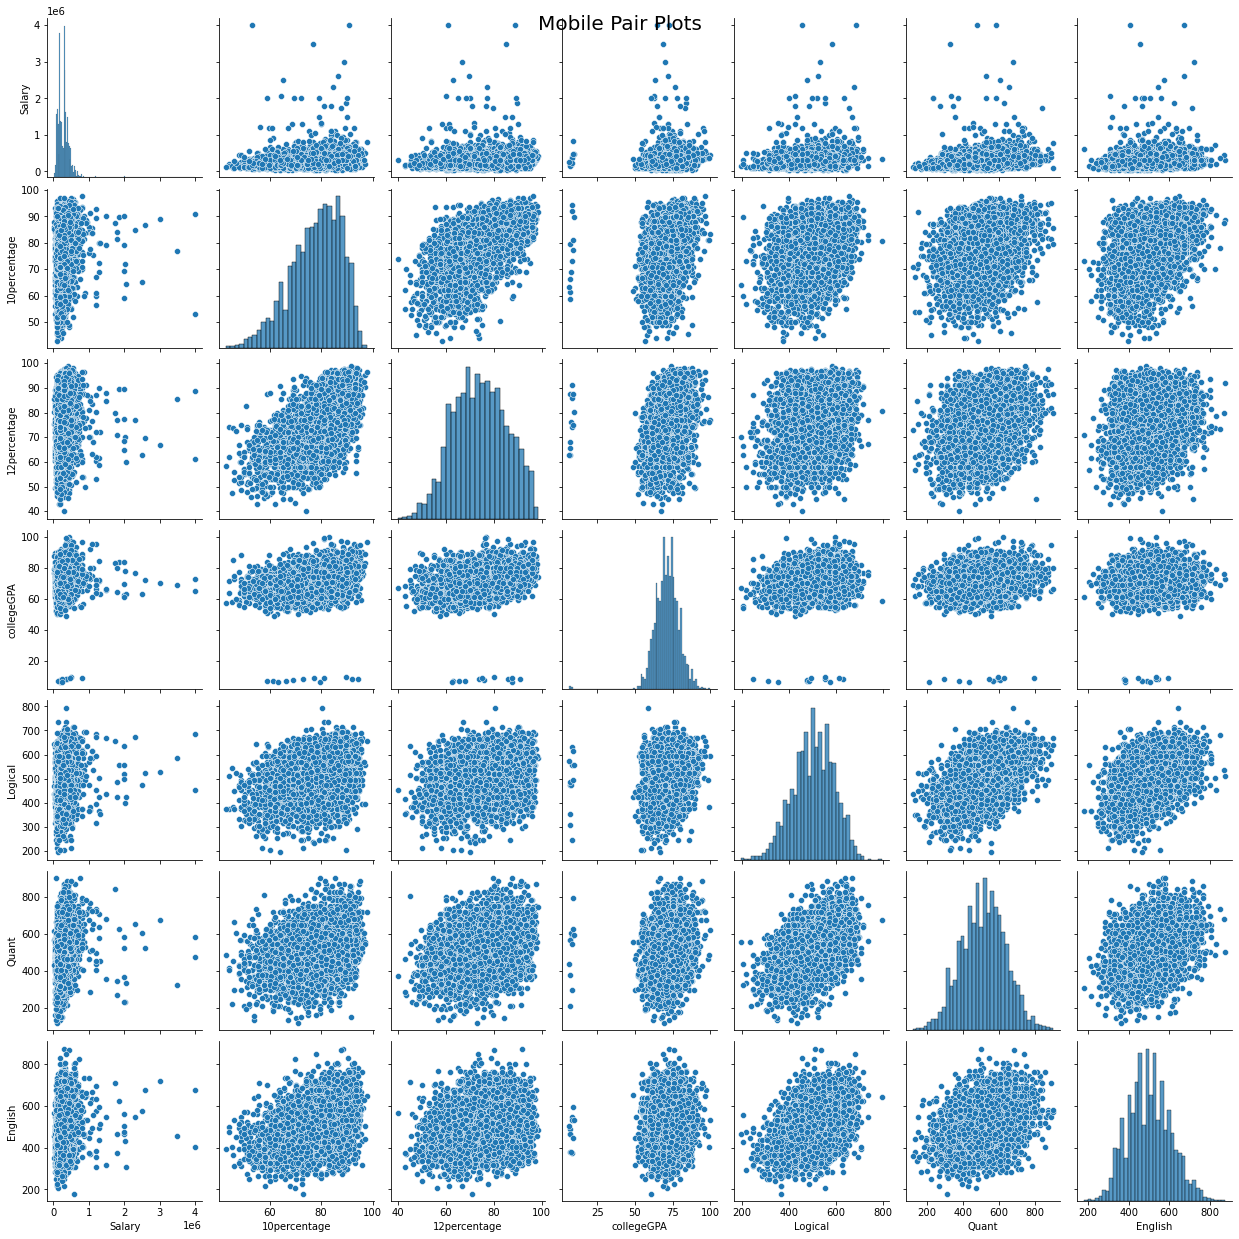

In [124]:
cols=['Salary','10percentage','12percentage','collegeGPA','Logical','Quant','English']
pp=sns.pairplot(job_df[cols])
fig=pp.fig
t=fig.suptitle('Mobile Pair Plots',fontsize=20)

In [ ]:
# We can find a positive corelation between 10percentage, 12percentage, Logical, Quant, English, College GPA
# But the Salary is almost independent of all these factors

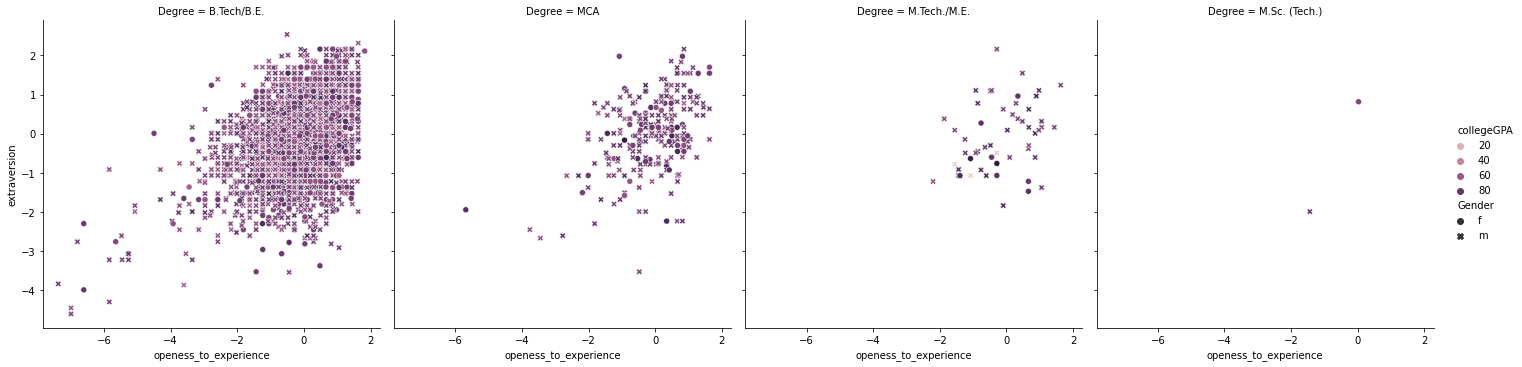

In [126]:
sns.relplot(x='openess_to_experience',y='extraversion',hue='collegeGPA',col='Degree',style='Gender',data=job_df)
#plt.title('Relation Plot between openess to experience and extraversion')

In [ ]:
# We can see a positive corelation between openess to experience, extraversion, in every degree
# And also we can see that mostly college GPA above 60(purple) are having a high scores in these two areas
# There is ni much difference in male and female, but male students are in high number

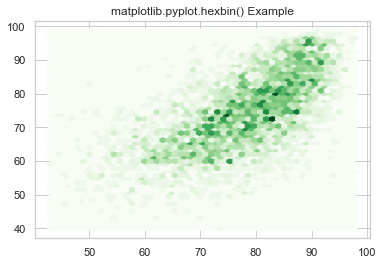

In [45]:
plt.hexbin(job_df['10percentage'], job_df['12percentage'], gridsize = 50, cmap ='Greens') 
plt.title('Hexbin plot of 10 percentage and 12 percentage') 
plt.show()

In [ ]:
# A hexbin plot is useful to represent the relationship of 2 numerical variables when you have a lot of data points. 
# Without overlapping of the points, the plotting window is split into several hexbins. 
#The color of each hexbin denotes the number of points in it.
# In this case the darkness of the green color is proportional to the number of students of that particular 10th and 12th percentage

<AxesSubplot:title={'center':'Line Plot of Sccores in ELectronics and Semiconductors and Telecom Engineering'}, xlabel='ElectronicsAndSemicon', ylabel='TelecomEngg'>

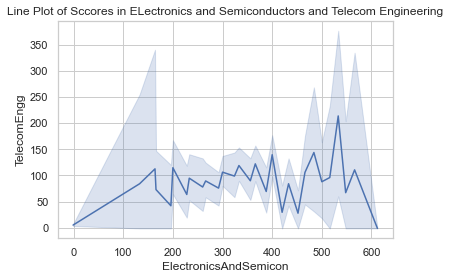

In [47]:
plt.title('Line Plot of Scores in ELectronics and Semiconductors and Telecom Engineering')
sns.lineplot(x='ElectronicsAndSemicon',y='TelecomEngg',data=job_df)

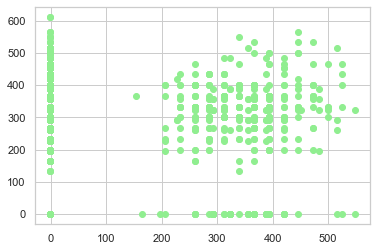

In [56]:
plt.scatter(job_df.TelecomEngg,job_df.ElectronicsAndSemicon, c='lightgreen')

In [ ]:
# Electronics and Semiconductor scores are not so much related

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Domain'>

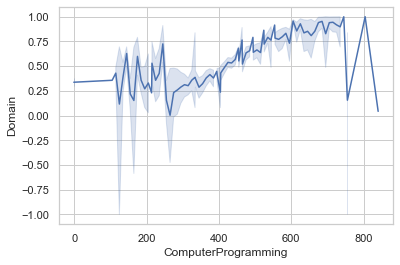

In [53]:
sns.lineplot(x='ComputerProgramming',y='Domain',data=job_df)

In [ ]:
# The scores in computer programming and domain are somewhat related, especially between Computer Programming score: 300-700

<AxesSubplot:xlabel='English', ylabel='Logical'>

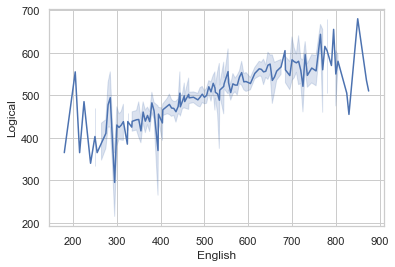

In [55]:
sns.lineplot(x='English',y='Logical',data=job_df)

In [ ]:
# It is clearly visible that English and Logical scores have a good corelation, especially between English scores of 300-800

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


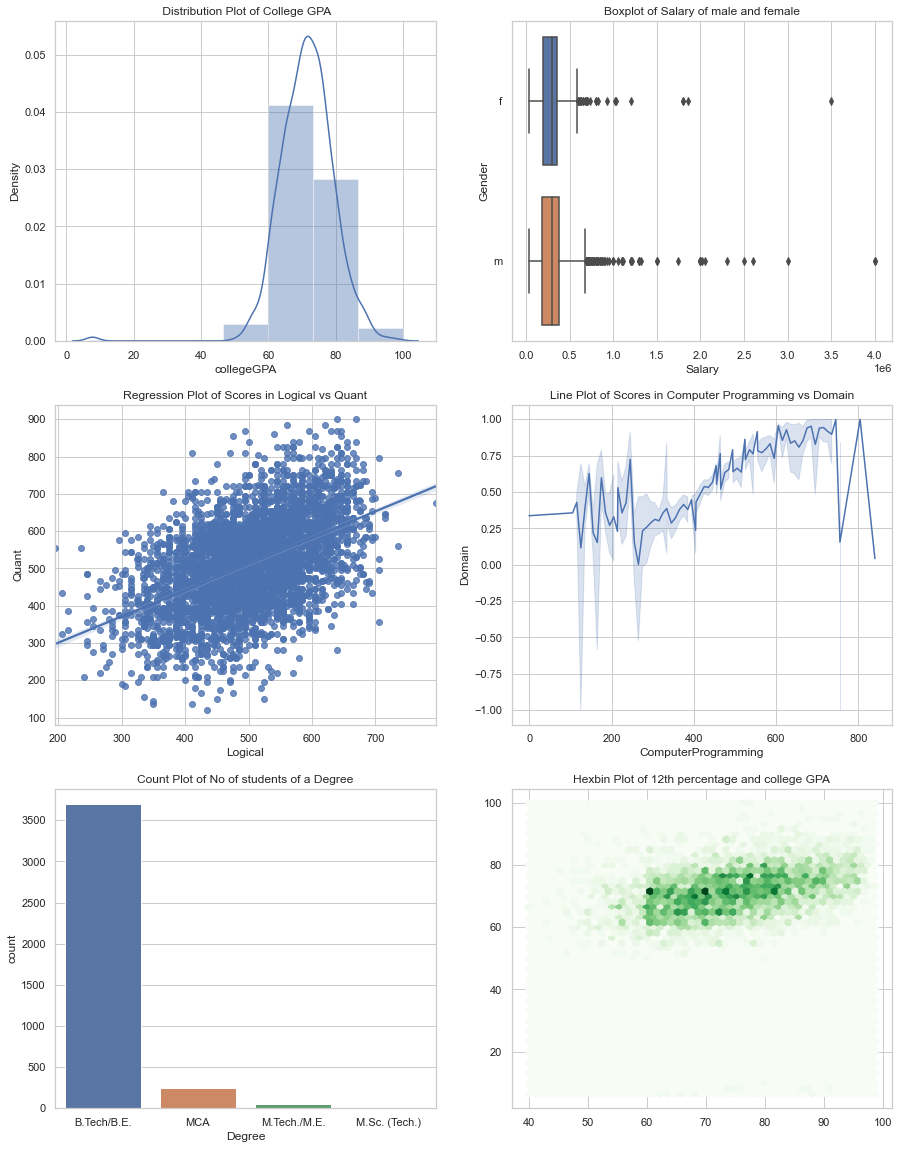

In [120]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
plt.title(' Distribution Plot of College GPA')
sns.distplot(job_df.collegeGPA,bins=7)
plt.subplot(3,2,2)
plt.title('Boxplot of Salary of male and female')
sns.boxplot(x='Salary',y='Gender',data=job_df)
plt.subplot(3,2,3)
plt.title('Regression Plot of Scores in Logical vs Quant')
sns.regplot(x='Logical',y='Quant',data=job_df)
plt.subplot(3,2,4)
plt.title('Line Plot of Scores in Computer Programming vs Domain')
sns.lineplot(x='ComputerProgramming',y='Domain',data=job_df)
plt.subplot(3,2,5)
plt.title('Count Plot of No of students of a Degree')
sns.countplot(x='Degree',data=job_df)
plt.subplot(3,2,6)
plt.title('Hexbin Plot of 12th percentage and college GPA')
plt.hexbin( job_df['12percentage'],job_df['collegeGPA'], gridsize = 50, cmap ='Greens')

In [ ]:
#CONCLUSION
#There is a positive corelation between :
#10thpercentage, 12th percentage, collegeGPA
#English, Logical, Quant are related
#10th and 12th percentage related with the collegeGPA, Eng,Logical,Quant
#Computer Programming, Domain are related